## PyTorch Data Preprocess

In [2]:
import os
from glob import glob

import torch
from torchvision import datasets, transforms

### Data Loader 불러오기
- PyTorch는 DataLoader를 불러 model에 넣는다
- https://pytorch.org/docs/stable/data.html

In [3]:
batch_size = 32
test_batch_size = 32

In [5]:
# Load dataloader
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=True, download=True, 
                   transform=transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize(mean=(0.5,), std=(0.5,))
                   ])),
    batch_size=batch_size,
    shuffle=True
)

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw


Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [7]:
# data에 대한 transform operation을 compose 객체의 list로 묶어서 구성
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset', train=False,
                   transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.5, ), (0.5,))
                   ])),
    batch_size=test_batch_size,
    shuffle=True
)

### 첫번째 iteration에서 나오는 데이터 확인

In [8]:
# dataloader는 generator
images, labels = next(iter(train_loader))

In [11]:
images.shape  # Batch, Channel, Height, Width (BCHW)

torch.Size([32, 1, 28, 28])

PyTorch는 TensorFlow와 다르게 [Batch Size, Channel, Height, Width]

### 데이터 시각화

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
images[0].shape

torch.Size([1, 28, 28])

In [15]:
torch_image = torch.squeeze(images[0])  # size 1 dimension removed
torch_image.shape

torch.Size([28, 28])

In [23]:
image = torch_image.numpy()
image.shape

(28, 28)

In [18]:
label = labels[0].numpy()

In [19]:
label.shape

()

In [20]:
label

array(2)

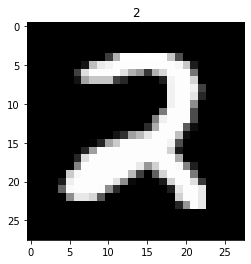

In [24]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show()